In [1]:
import numpy as np 
import torch
import matplotlib.pyplot as plt 
import gymnasium as gym
import torch.nn.functional as F
import copy
from stable_baselines3 import PPO,SAC
from Models import Models_env
#Global params
T = 26
nsteps = 100



In [2]:
SP = {
    'Ca': [0.8 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}

r_scale ={
    '0': 5 #Reward scale for each state
}
disturbance = {
    'Caf': np.array([1 for i in range(int(nsteps/4))]+[1.05 for i in range(int(nsteps/2))]+[1 for i in range(int(nsteps/4))]),
}
env_params = {
    'Nx': 2, # Number of states
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'Nu':1, # Number of control/actions
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'dt': 1., # Time step
    'x0': np.array([0.8,330,0.8]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'r_scale': r_scale, #Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':True, #Add noise to the states
    'integration_method': 'jax', #Select the integration method
    'noise_percentage':0.001, #Noise percentage
    'disturbances':disturbance #Add disturbance to the states
}


cons = {
    'T' :330
}

cons_type = {
    'T':'<='
}

env_params.update({
'done_on_cons_vio':False,
'constraints': cons, 
'cons_type': cons_type,
'r_penalty': True})
env = Models_env(env_params)

In [3]:
policy = SAC.load("SAC_cstr")

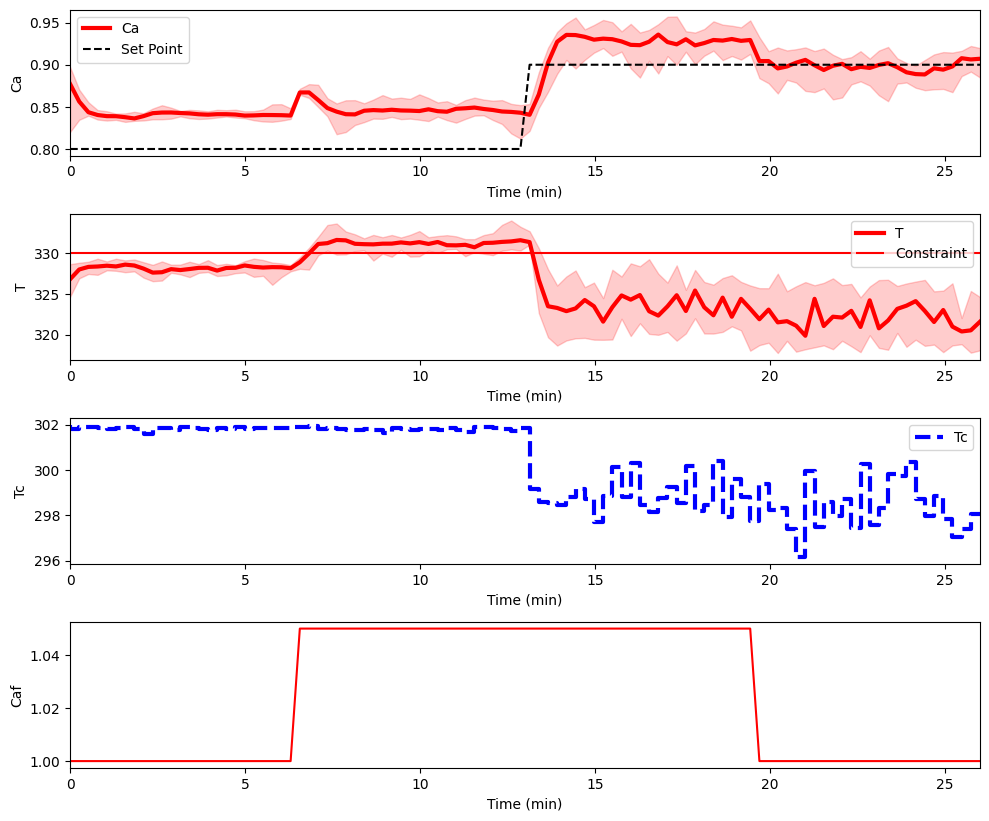

In [4]:
env.plot_rollout(policy,10)

In [5]:
from model_classes import cstr_ode
m = cstr_ode()
print(m.info()['states'])

for i in m.info()['states']:
  print(i)

['Ca', 'T']
Ca
T
